Dataset Length:  101
Dataset Shape:  (101, 17)
   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   1   0   0   1   0   0   1   1   1   1   0   0   4   0   0   1   1
1   1   0   0   1   0   0   0   1   1   1   0   0   4   1   0   1   1
2   0   0   1   0   0   1   1   1   1   0   0   1   0   1   0   0   4
3   1   0   0   1   0   0   1   1   1   1   0   0   4   0   0   1   1
4   1   0   0   1   0   0   1   1   1   1   0   0   4   1   0   1   1
[[1 0 0 ... 4 0 0]
 [1 0 0 ... 4 1 0]
 [0 0 1 ... 0 1 0]
 ...
 [1 0 0 ... 4 1 0]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 2 1 0]]
[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]
[2 4 5 1 1 5 1 2 2 2 1 6 1 3 6 1 4 1 2 2 1 1 2 2 1 1 2 2 6 2 1]
Predicted values using entropy:
[2 4 2 1 1 2 1 2 2 2 1 6 1 2 6 1 4 1 2 2 1 1 2 2 1 1 2 2 6 2 1]
Using entropy:
Confusion Matrix:  [[12  0  0  0

/home/root1/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/root1/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/root1/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/root1/anaconda3/lib/python3.

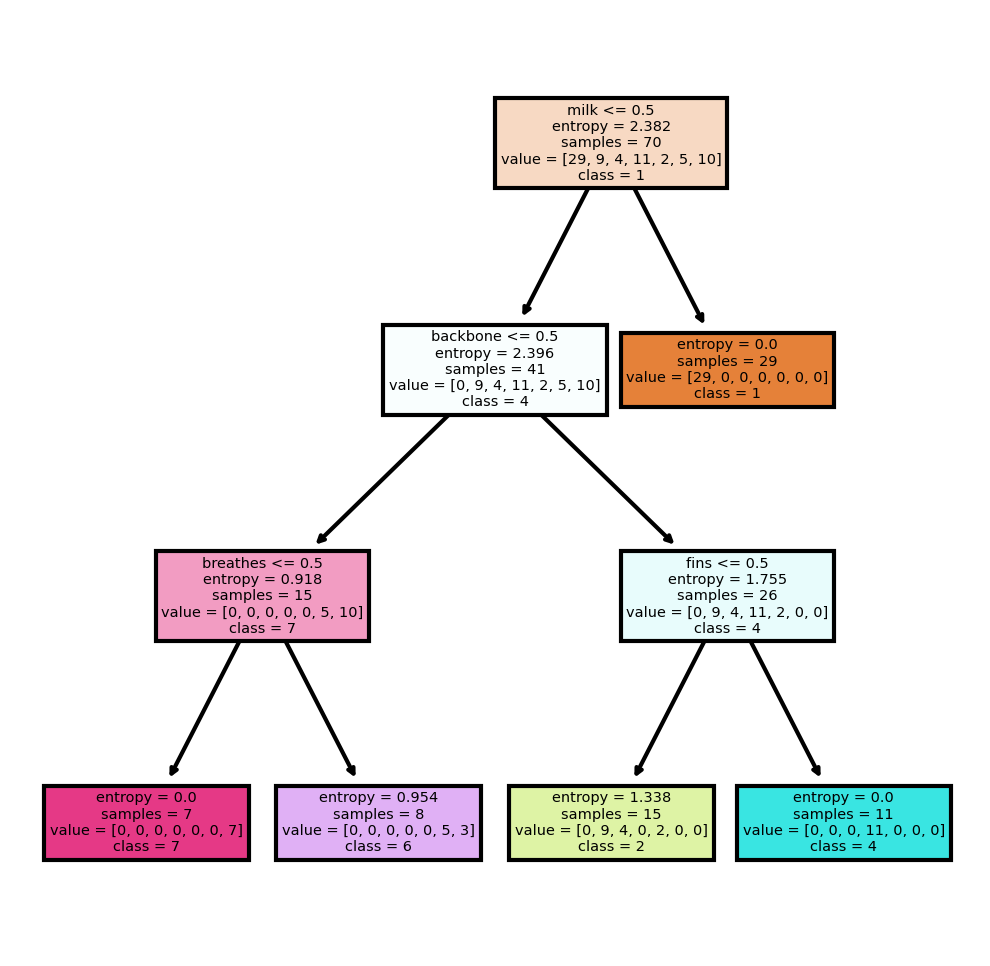

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

zoodata = pd.read_csv('zoo_data.csv',sep= ',', header = None)

print ("Dataset Length: ", len(zoodata))
print ("Dataset Shape: ", zoodata.shape)
print(zoodata.head())

X = zoodata.values[:, 0:15]
Y = zoodata.values[:, 16]

print(X)
print(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)

clf_gini = DecisionTreeClassifier(random_state = 100,max_depth = 3, min_samples_leaf = 5)

clf_entropy.fit(X_train, y_train)

clf_gini.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)
print(y_test)
print("Predicted values using entropy:")
print(y_pred_entropy)
print("Using entropy:")
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_entropy))
print ("Accuracy : ",accuracy_score(y_test,y_pred_entropy)*100)
print("class-wise report : ",classification_report(y_test, y_pred_entropy))

y_pred_gini = clf_gini.predict(X_test)
print("Predicted values using gini index:")
print(y_pred_gini)
print("Using gini index:")
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_gini))
print ("Accuracy : ",accuracy_score(y_test,y_pred_gini)*100)
print("class-wise report : ",classification_report(y_test, y_pred_gini))

fn=['hair','feathers','eggs','milk','airborne','aquatic',
    'predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']
cn=['1', '2', '3','4', '5', '6','7']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_entropy,feature_names = fn, class_names=cn,filled = True);
fig.savefig('entropytree.png')



